<a href="https://colab.research.google.com/github/vinayaka4/idmp_project/blob/vin/idmp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing necessary Libraries**

In [3]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Deeplearning/ML
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

### **Data Exploration**

In [5]:
## Creating sentimental polarity
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

In [7]:
## Importing CSV file
df = pd.read_csv("//content//project_data.csv", encoding='ISO-8859-1')

In [9]:
df.head()

,S.No.,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4* experience hotel monaco seat...,3
3,4,unique \tgreat stay \twonderful time hotel mon...,5
4,5,great stay great stay \twent seahawk game awes...,5


In [10]:
## Applying Compund score
polarity_scores = df["Review"].astype("str").apply(compound_score)
df["Sentiment_Score"] = polarity_scores

## Applying Sentiment
df["Sentiment"] = df["Sentiment_Score"].apply(sentiment)

In [11]:
df.to_csv("data.csv",index=False)
df.Sentiment.value_counts()

Sentiment
Positive    18321
Negative     1093
Neutral      1077
Name: count, dtype: int64

In [12]:
data=pd.read_csv('data.csv')

# Having a look at the data
data.head()

,S.No.,Review,Rating,Sentiment_Score,Sentiment
0,1,nice hotel expensive parking got good deal sta...,4,0.9626,Positive
1,2,ok nothing special charge diamond member hilto...,2,0.9870,Positive
2,3,nice rooms not 4* experience hotel monaco seat...,3,0.9852,Positive
3,4,unique \tgreat stay \twonderful time hotel mon...,5,0.9920,Positive
4,5,great stay great stay \twent seahawk game awes...,5,0.9870,Positive


In [13]:
data.isna().sum()


S.No.              0
Review             0
Rating             0
Sentiment_Score    0
Sentiment          0
dtype: int64

<ipython-input-14-46e0ae474679>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="Sentiment",palette="deep");


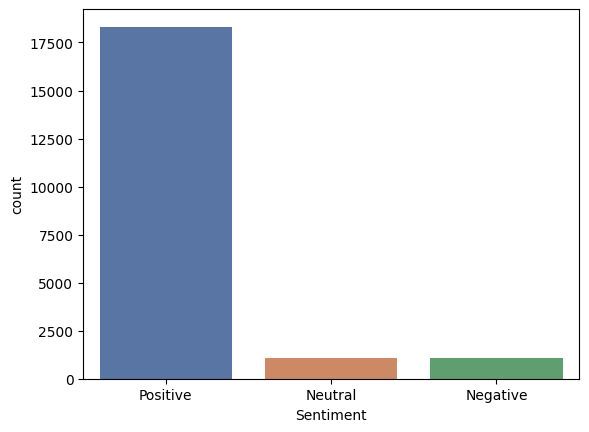

In [14]:
sns.countplot(data=data,x="Sentiment",palette="deep");

In [15]:
Viz_1 = data[['Rating','Sentiment']].value_counts().rename_axis(['Rating','Sentiment']).reset_index(name='counts')

# Plotting the Bar Graph
fig = px.bar(x=Viz_1.Rating, y=Viz_1.counts, color=Viz_1.Sentiment,color_discrete_sequence=px.colors.qualitative.Pastel,title="Sentiment & Ratings",labels={'x':'Ratings','y':'Total Number'})
fig.show()

In [16]:
Viz_2 = data['Rating'].value_counts().rename_axis(['Rating']).reset_index(name='counts')

# Plotting  pie chart for ratings
fig_pie = px.pie(values=Viz_2.counts, names=Viz_2.Rating, title='Rating Distribution of the data',color_discrete_sequence=px.colors.qualitative.Pastel)
fig_pie.show()

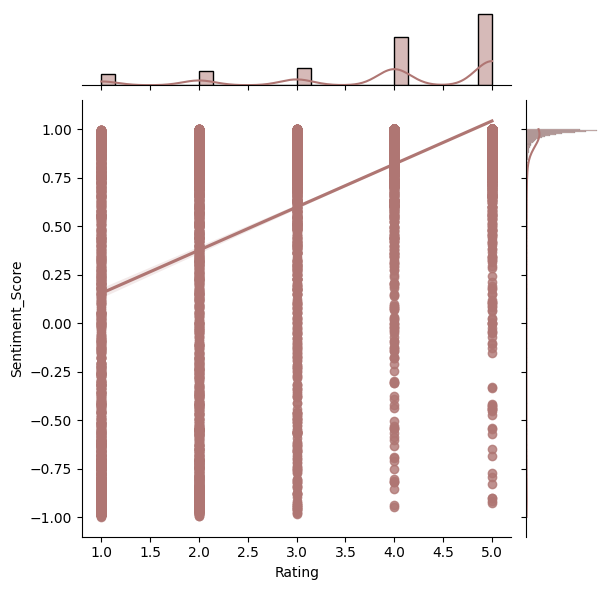

In [17]:
jp = sns.jointplot(data=data,x='Rating',y='Sentiment_Score',kind="reg",color='#af7673')

In [18]:
fig = go.Figure()

Ratings = [1,2,3,4,5]

for rating in Ratings:
    fig.add_trace(go.Violin(x=data['Rating'][data['Rating'] == rating],
                            y=data['Sentiment_Score'][data['Rating'] == rating],
                            name=rating,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(
    title="Violin plot of Rating and Sentiment Score with box plot",
    xaxis_title="Rating",
    yaxis_title="Sentiment Score",
    font=dict(
        family="Courier New, monospace",
        size=12,

    )
)
fig.show()

In [19]:
data.head(5)

,S.No.,Review,Rating,Sentiment_Score,Sentiment
0,1,nice hotel expensive parking got good deal sta...,4,0.9626,Positive
1,2,ok nothing special charge diamond member hilto...,2,0.9870,Positive
2,3,nice rooms not 4* experience hotel monaco seat...,3,0.9852,Positive
3,4,unique \tgreat stay \twonderful time hotel mon...,5,0.9920,Positive
4,5,great stay great stay \twent seahawk game awes...,5,0.9870,Positive


In [20]:
sentiments = ['Positive', 'Negative', 'Neutral']

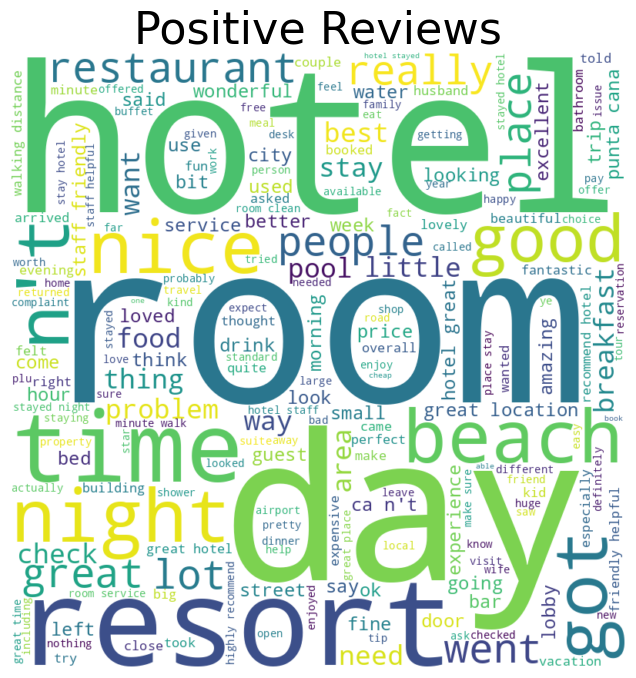

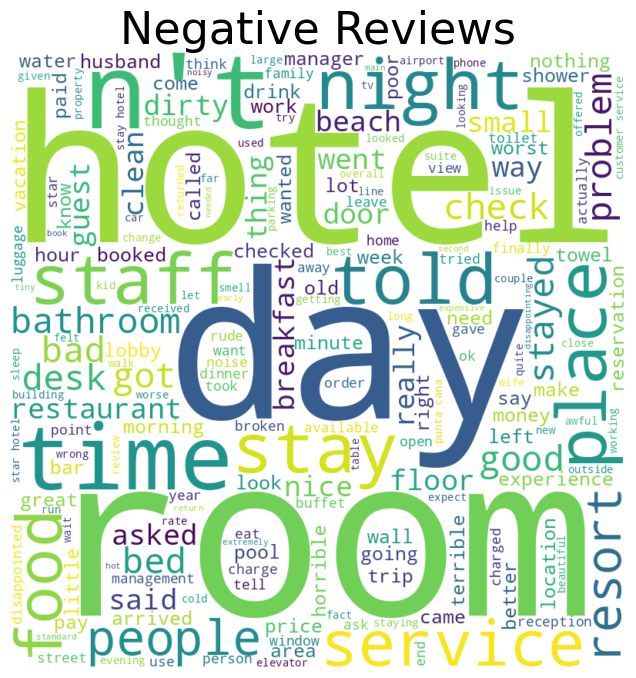

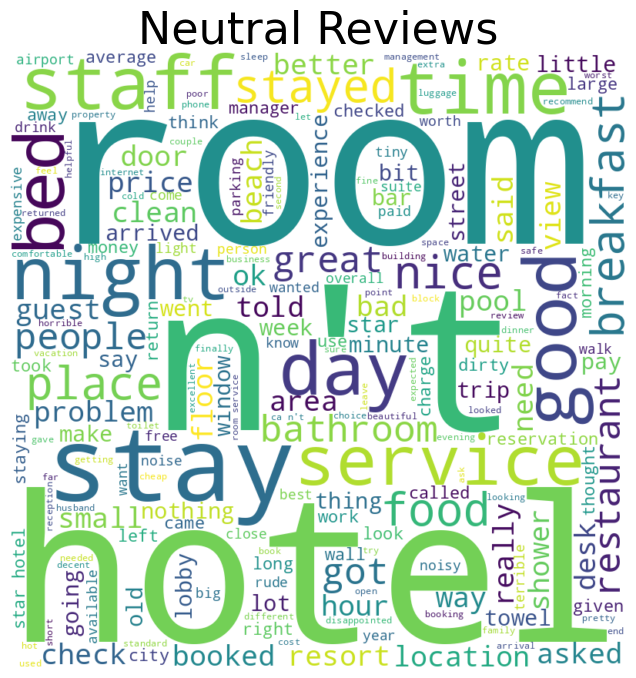

In [21]:
for sentiment in sentiments:
  text1 =''
  for i in data[data['Sentiment']==str(sentiment)]['Review'].values:
      text1+=i + ' '

  wc = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
      repeat=True,)
  wc.generate(text1)
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.axis("off")
  plt.imshow(wc, interpolation="bilinear")
  plt.title(sentiment+' Reviews',fontsize=32);

In [22]:
pip install yake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.4 MB/s eta 0:00:00


In [23]:
import yake

# Configure YAKE
language = "en"
max_ngram_size = 1
deduplication_threshold = 0.9
numOfKeywords = 10

# Initialize YAKE keyword extractor
kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)

# Function to apply YAKE on each review and return extracted keywords as a string separated by commas
def extract_keywords_yake(text):
    keywords = kw_extractor.extract_keywords(text)
    # Extracts keywords and joins them with comma, you can adjust formatting as needed
    return ','.join([keyword for keyword, score in keywords])

# Apply function to extract keywords with YAKE
data["keywords"] = data["Review"].apply(lambda x: extract_keywords_yake(x))

# Optional: Aggregate all extracted keywords into a list, splitting by comma
words = []
for keywords_str in data.keywords.values:
    words.extend(keywords_str.split(","))

# Now 'words' contains all the keywords extracted from all reviews, potentially with duplicates
# To get unique keywords, you can convert 'words' to a set
unique_words = set(words)

In [ ]:
# unique_words

In [26]:
from collections import Counter
word_counter = Counter(words)
word_df = pd.DataFrame(np.array(list(word_counter.items())),columns=["keyword","count"])

In [27]:
word_df["count"] = word_df["count"].astype(int)
word_df = word_df.sort_values(['count'], ascending=False)
top_20 = word_df[0:19]
word_df.head(10)


,keyword,count
3,hotel,12440
2,room,7470
20,great,6157
4,stay,4293
69,stayed,3861
8,good,3795
82,location,3149
49,staff,2947
0,nice,2670
5,night,1958


<ipython-input-28-79fad880922b>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




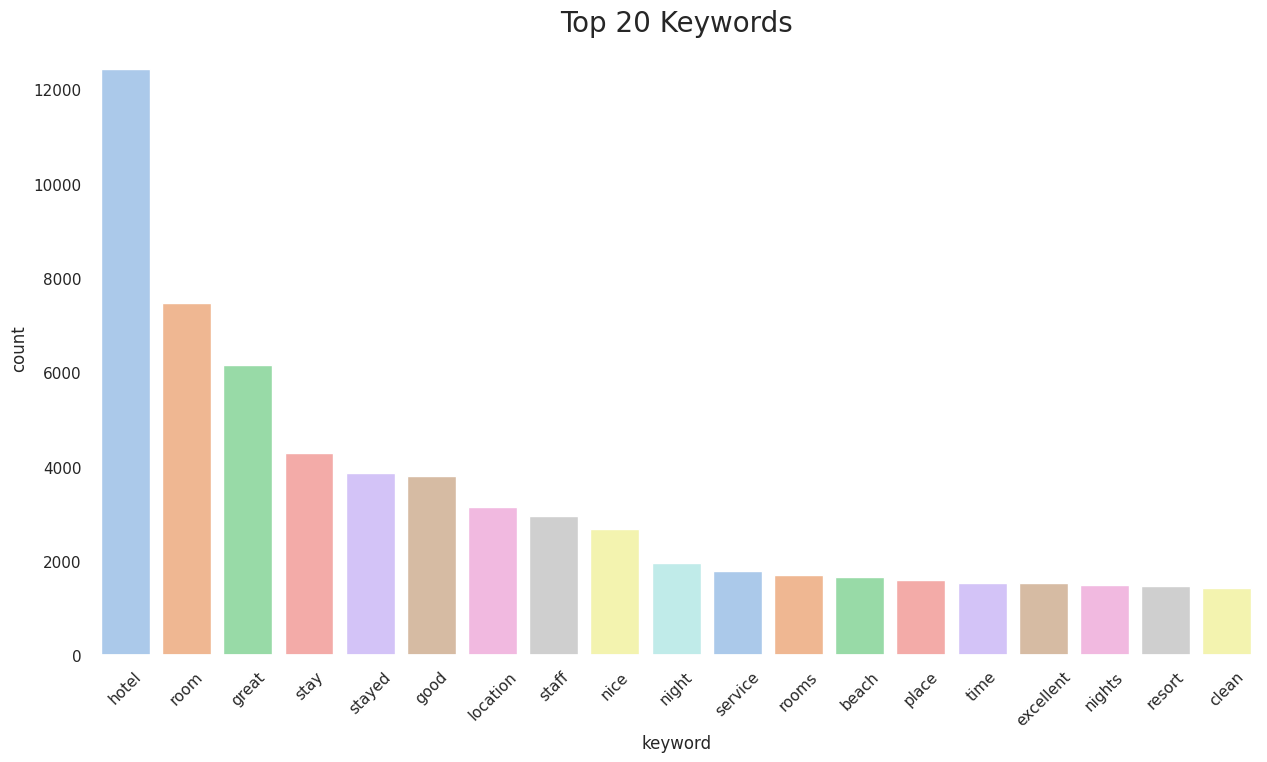

In [28]:
sns.set(rc={'figure.figsize':(15,8)})
fig, ax = plt.subplots()

ax = sns.barplot(data=top_20,x="keyword",y="count",palette="pastel")
ax.patch.set_visible(False)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_title("Top 20 Keywords",fontsize=20);


In [29]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
top5 = ["hotel","room","rooms","hotels"]
for x in top5:
    data["Review"] = data["Review"].astype(str).str.replace(x,"")

In [31]:
data.head(2)


,S.No.,Review,Rating,Sentiment_Score,Sentiment,keywords
0,1,nice expensive parking got good deal stay an...,4,0.9626,Positive,"nice,parking,room,hotel,stay,night,pay,expensi..."
1,2,ok nothing special charge diamond member hilto...,2,0.9870,Positive,"room,website,desk,email,good,hotel,breakfast,s..."


In [32]:
data2=data.copy()

def removing_stop_words(txt):
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(txt)

    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    return filtered_sentence

data2["Review"] = data2["Review"].apply(removing_stop_words)

In [33]:
# Making a function to lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(data):
    lema_data=[]
    for j in data:
        x=j.lower()
        x=lemmatizer.lemmatize(j,pos='n')
        x=lemmatizer.lemmatize(j,pos='v')
        x=lemmatizer.lemmatize(j,pos='a')
        x=lemmatizer.lemmatize(j,pos='r')
        x=lemmatizer.lemmatize(x)
        lema_data.append(x)
    return lema_data


data2["Review"] = data2["Review"].apply(lemmatize)

In [34]:
data2["Review"] = data2["Review"].apply(lambda x:" ".join(token for token in x))


In [35]:
data2.head(2)


,S.No.,Review,Rating,Sentiment_Score,Sentiment,keywords
0,1,nice expensive parking got good deal stay anni...,4,0.9626,Positive,"nice,parking,room,hotel,stay,night,pay,expensi..."
1,2,ok nothing special charge diamond member hilto...,2,0.9870,Positive,"room,website,desk,email,good,hotel,breakfast,s..."


In [40]:
X = data2["Review"].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

<ipython-input-41-2c363bb2cf99>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



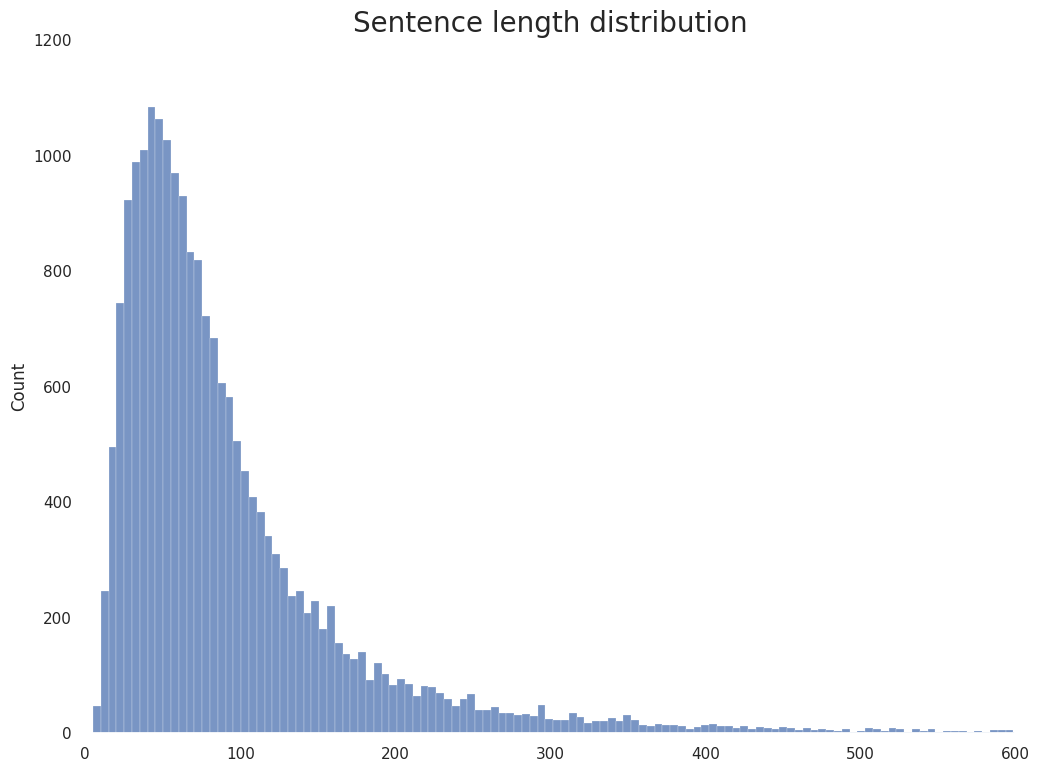

In [41]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12,9)})
length_dist = [len(x.split(" ")) for x in X]
sns.histplot(length_dist,palette="pastel")
ax.patch.set_visible(False)
ax.set_xlim(0,600)
ax.set_ylim(0,1200)
ax.set_title("Sentence length distribution",fontsize=20);
plt.show()


In [42]:
X = tokenizer.texts_to_sequences(X)

max_length = max([len(x) for x in X])
vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("max length of sentence: {}".format(max_length))

Vocabulary size: 48975
max length of sentence: 1931


In [43]:
X = pad_sequences(X, padding='post', maxlen=600)

In [44]:
labels = ['1', '2', '3', '4', '5']

y = data['Rating']
y = y.map({1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           })

In [45]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)
